In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

## Cross Validation 

In [6]:
boston = datasets.load_boston()
print(boston.keys())
print(boston['feature_names'])

dict_keys(['target', 'feature_names', 'DESCR', 'data'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [10]:
# features and target
X = boston.data
y = boston.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [25]:
reg = linear_model.LinearRegression()
#%timeit cv_results = cross_val_score(reg, X, y, cv=5)
cv_results = cross_val_score(reg, X, y, cv=5)

# these are r2 scores
print(cv_results)

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]


In [23]:
print("Average 5-fold cv score: {r2}".format(r2=np.mean(cv_results)))

Average 5-fold cv score: 0.3507413509325187


## Regularized Regression 

### Why regularize?

* Recall: Linear regression minimizes a loss function
* Large coefficients can lead to overfitting (esp in high dimensional space)
* Penalizing large coefficients: regularization

### Ridge Regression:

Loss function = OLS loss function + alpha * sumation(ai^2)
* Alpha is a parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Alpha controls model complexity
    * When alpha = 0 we get back OLS (over fitting)
    * When alpha is large - can lead to underfitting

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(y_train.shape)

(354, 13)
(354,)


In [32]:
# fit model
# normalize ensures all our variables are on the same scale
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [33]:
# predict on test set
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.69955650271004211

### Lasso Regression:
Loss function = OLS loss function + alpha * sumation(abs(ai)

In [35]:
# fit model
lasso = linear_model.Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.59502292925878275

### Lasso regression can be used for feature selection
* Can be used to select import features of a dataset
* Shinks nonvaluable feature coefficients to 0

In [39]:
X_names = boston.feature_names
X_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

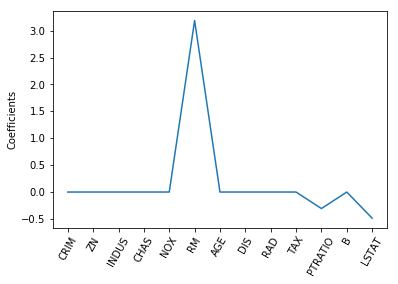

In [48]:
# plot feature importance
lasso_coef = lasso.coef_
plt.plot(range(len(X_names)), lasso_coef)
plt.xticks(range(len(X_names)), X_names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

### Note - Lasso good for feature selection, Ridge should be first choice for building models

## Example of using Ridge and looping over alpha

In [53]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# create a ridge regressor
ridge = linear_model.Ridge(normalize=True)

In [54]:
# Compute scores over range of alphas
for alpha in alpha_space:
    
    # Specify the alpha to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 5-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [59]:
# function to display plots
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    
    std_error = cv_scores_std / np.sqrt(10)
    
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

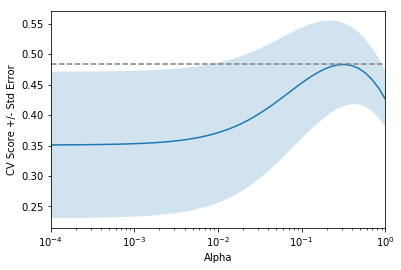

In [60]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)